## 1. Import Library

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn import tree

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## 2. Load data

In [68]:
data=pd.read_csv("iris.csv")

## 3. undestanding the data

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [70]:
data. describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [71]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## 4. Data Pre processing

In [72]:
data = data.drop(['Id'], axis =1)

In [74]:
#label encode
data=data.replace(to_replace={'Species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [75]:
#change data tpe of class attribut to catego
#sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',center=0)
data['Species'] = data['Species'].astype('category').cat.codes

## 5. Explantory data analysis

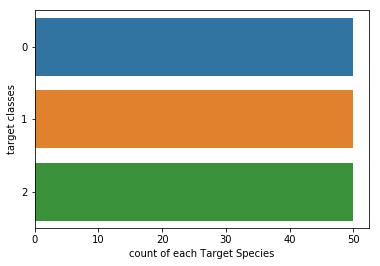

In [76]:
sns.countplot(y=data['Species'],data=data)
plt.ylabel('target classes')
plt.xlabel('count of each Target Species')
plt.show()

## 6.Model Building

In [78]:
x = data.drop(['Species'], axis =1)
y = data['Species']

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [80]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [81]:
#Create an instance and fit the model
decmodel1 = DecisionTreeClassifier (criterion='gini',random_state=0)

#Fitting the train and test data
decmodel1.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [82]:
y_pred1 = decmodel1.predict(x_test)
predicted1=y_pred1
actual=y_test
score_lr= accuracy_score(y_test,y_pred1)
print("Accucac \t",score_lr)
results=confusion_matrix(actual,predicted1)
print('confusion matrix \n',results)

Accucac 	 0.9111111111111111
confusion matrix 
 [[16  0  0]
 [ 0 14  4]
 [ 0  0 11]]


In [96]:
feature_names = data.columns[:4]
target_names = data['Species'].unique().tolist()
arget_names=['0','1','2']
feature_names

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

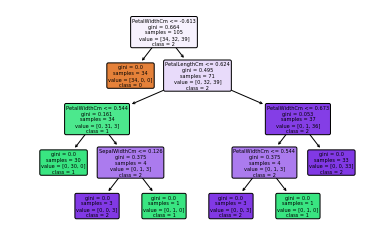

In [97]:
tree.plot_tree(decmodel1,
               feature_names =feature_names, 
               class_names=arget_names,
               rounded=True,  filled = True);
#plt.savefig('tree_visualization.png')

In [83]:
#Create an instance and fit the model
decmodel2 = DecisionTreeClassifier (criterion='entropy',random_state=0)

#Fitting the train and test data
decmodel2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [84]:
y_pred2 = decmodel2.predict(x_test)
predicted2=y_pred2
actual=y_test
score_lr1= accuracy_score(y_test,y_pred2)
print("Accucac \t",score_lr1)
results2=confusion_matrix(actual,predicted2)
print('confusion matrix \n',results2)

Accucac 	 0.9111111111111111
confusion matrix 
 [[16  0  0]
 [ 0 14  4]
 [ 0  0 11]]


In [65]:
#tree.plot_tree(decmodel2);

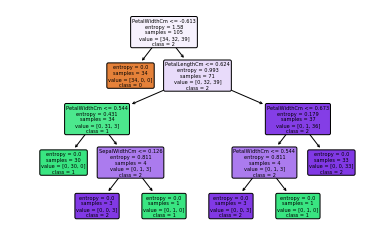

In [92]:
tree.plot_tree(decmodel2,
               feature_names =feature_names, 
               class_names=arget_names,
               rounded=True,  filled = True);
#plt.savefig('tree_visualization.png') 